In [1]:
setwd('/import/liujing/data2/scrna/')
library(cellcall)
scRNA = readRDS('scRNA.xifen.rds')
library(Seurat)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire i

In [2]:
table(scRNA$group)


   CI   Con 
34017 21222 

In [3]:
Idents(scRNA) = 'celltype'

In [4]:
scRNA = subset(scRNA,downsample = 5000)

In [5]:
Idents(scRNA) = 'celltype'

In [6]:
table(scRNA$celltype)


            B_cell             CD4_tn                 NK        Neutrophils 
                25                903                646               5000 
           cd8_tem     classical_mono non_classical_mono               treg 
               572                216                 42                780 

In [7]:
Idents(scRNA) = 'group'
Con = subset(scRNA,idents = 'Con')
library(Seurat)
library(dplyr)
Idents(Con) = 'celltype'
scRNA = Con
#scRNA1 = subset(LS, downsample = 500)
table(scRNA$celltype)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union





            B_cell             CD4_tn                 NK        Neutrophils 
                11                445                305               1912 
           cd8_tem     classical_mono non_classical_mono               treg 
               295                 70                 10                328 

In [8]:

library(Seurat)
# scRNA$celltype = gsub('Monocyte:CD16-','MonoCD16neg',scRNA$celltype)
# scRNA$celltype = gsub('Monocyte:CD16[:+:]','MonoCD16pos',scRNA$celltype)
scRNA$celltype = gsub('cd8_tem','cd8tem',scRNA$celltype)
scRNA$celltype = gsub('CD4_tn','CD4tn',scRNA$celltype)
scRNA$celltype = gsub('B_cell','Bcell',scRNA$celltype)
scRNA$celltype = gsub('classical_mono','classicalmono',scRNA$celltype)
scRNA$celltype = gsub('non_classical_mono','nonclassicalmono',scRNA$celltype)
table(scRNA$celltype)
table(scRNA$group)


            Bcell             CD4tn                NK       Neutrophils 
               11               445               305              1912 
           cd8tem     classicalmono non_classicalmono              treg 
              295                70                10               328 


 Con 
3376 

In [29]:
Idents(scRNA)  ='celltype'

In [30]:
scRNA = subset(scRNA,idents = c('CD4tn','NK','Neutrophils','cd8tem','classicalmono','treg'))

In [31]:
scRNA$celltype = factor(scRNA$celltype,levels =c('Neutrophils','classicalmono','NK','CD4tn','cd8tem','treg') )

In [32]:
test = CreateObject_fromSeurat(Seurat.object=scRNA,slot="counts",
                               cell_type="celltype",
                               data_source="UMI",
                               scale.factor =10^6,
                               Org = "Homo sapiens") 

In [33]:
mt <- TransCommuProfile(object = test,
                        pValueCor = 0.05,
                        CorValue = 0.1,
                        topTargetCor=1,
                        p.adjust = 0.5,
                        use.type="median",
                        probs = 0.8,
                        method="weighted",
                        IS_core = TRUE,
                        Org = 'Homo sapiens')

  Ligand_ID Receptor_ID TF_ID               Pathway Ligand_Symbol
1 100506658   100506658  2626 hsa04530_3,hsa04530_5          OCLN
2 100506658   100506658  8531            hsa04530_2          OCLN
3     10344        1230  2309            hsa04062_5         CCL26
4     10344        1230  3551            hsa04062_5         CCL26
  Receptor_Symbol TF_Symbol
1            OCLN     GATA4
2            OCLN      YBX3
3            CCR1     FOXO3
4            CCR1     IKBKB
[1] "step1: compute means of gene"
[1] "Neutrophils"   "classicalmono" "NK"            "CD4tn"        
[5] "cd8tem"        "treg"         
[1] "Neutrophils"
[1] "classicalmono"
[1] "NK"
[1] "CD4tn"
[1] "cd8tem"
[1] "treg"
[1] "step2: filter tf-gene with correlation, then score regulons"
[1] "Neutrophils"


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.6% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use =

[1] 3
[1] "classicalmono"


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"

[1] 8
[1] "cd8tem"


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (1.6% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in cor(x, y, use =

[1] 17
[1] "treg"


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (1.9% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use =

[1] 21
[1] "Neutrophils"
[1] 3


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.6% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


[1] "classicalmono"
[1] 19


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"

[1] "NK"
[1] 13


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"

[1] "CD4tn"
[1] 8


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"

[1] "cd8tem"
[1] 17


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"

[1] "treg"
[1] 21


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"

[1] "step3: get distance between receptor and tf in pathway"
[1] "step4: score downstream activation of ligand-receptor all regulons of given ligand-receptor relation (weighted, max, or mean) ####"
[1] "step5: softmax for ligand"
[1] "step6: score ligand-receptor relation (weighted, max, or mean) ####"


In [34]:
shuxu = colnames(mt@data$expr_l_r_log2_scale)

In [35]:
save(shuxu,file = 'shunxu.rda')

In [36]:
length(shuxu)

[1] 36

In [37]:
table(scRNA$group)


 Con 
3355 

In [56]:
options(repr.plot.width = 14,repr.plot.height = 12)

[1] "Neutrophils-Neutrophils"
[1] "Neutrophils-classicalmono"
[1] "Neutrophils-NK"
[1] "Neutrophils-CD4tn"
[1] "Neutrophils-cd8tem"
[1] "Neutrophils-treg"
[1] "classicalmono-Neutrophils"
[1] "classicalmono-classicalmono"
[1] "classicalmono-NK"
[1] "classicalmono-CD4tn"
[1] "classicalmono-cd8tem"
[1] "classicalmono-treg"
[1] "NK-Neutrophils"
[1] "NK-classicalmono"
[1] "NK-NK"
[1] "NK-CD4tn"
[1] "NK-cd8tem"
[1] "NK-treg"
[1] "CD4tn-Neutrophils"
[1] "CD4tn-classicalmono"
[1] "CD4tn-NK"
[1] "CD4tn-CD4tn"
[1] "CD4tn-cd8tem"
[1] "CD4tn-treg"
[1] "cd8tem-Neutrophils"
[1] "cd8tem-classicalmono"
[1] "cd8tem-NK"
[1] "cd8tem-CD4tn"
[1] "cd8tem-cd8tem"
[1] "cd8tem-treg"
[1] "treg-Neutrophils"
[1] "treg-classicalmono"
[1] "treg-NK"
[1] "treg-CD4tn"
[1] "treg-cd8tem"
[1] "treg-treg"


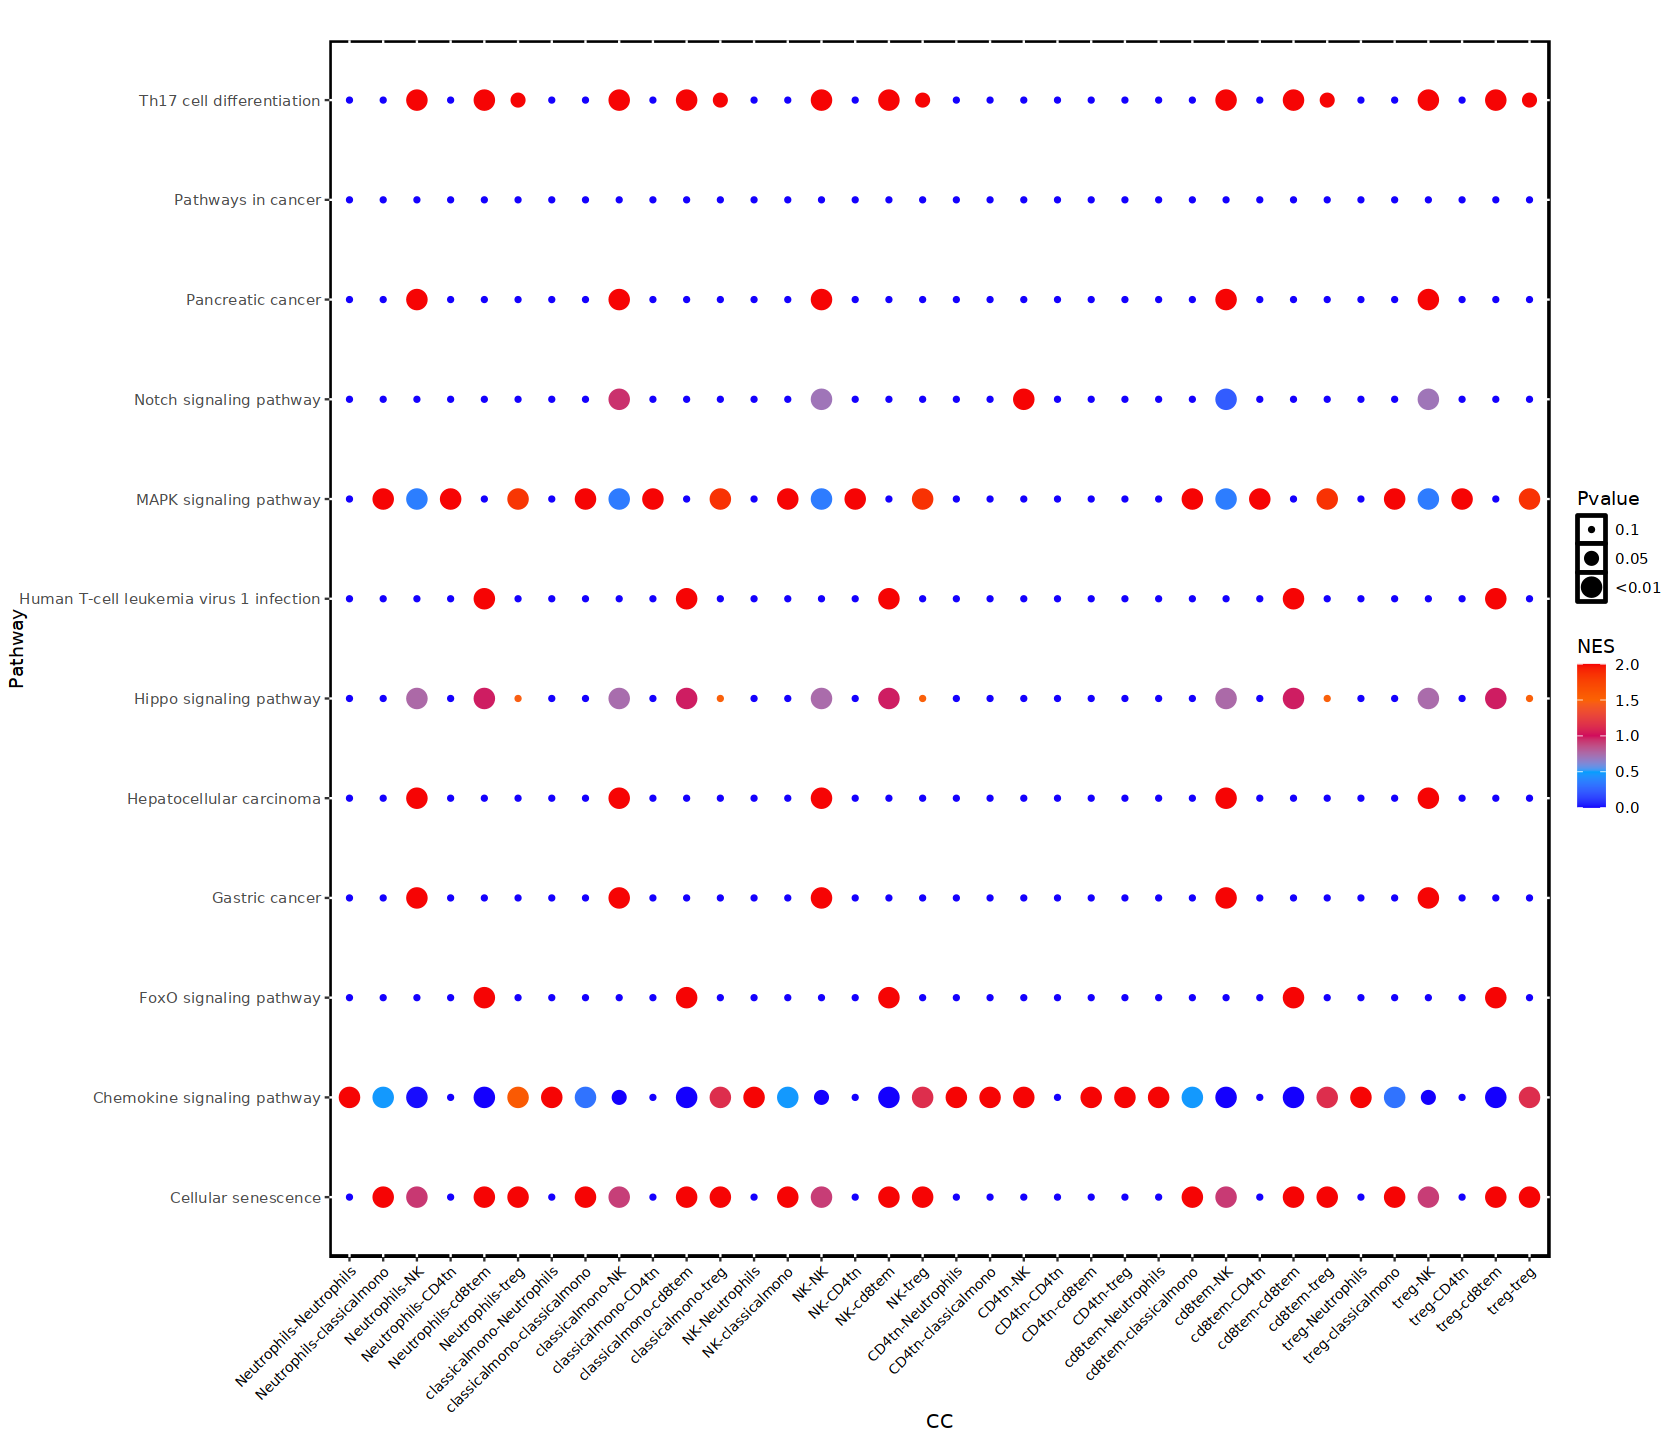

In [57]:
n <- mt@data$expr_l_r_log2_scale
pathway.hyper.list <- lapply(colnames(n), function(i){
    print(i)
tmp <- getHyperPathway(data = n, object = mt, cella_cellb = i, Org="Homo sapiens")
return(tmp)
})
myPub.df <- getForBubble(pathway.hyper.list, cella_cellb=colnames(n))
plotBubble(myPub.df)

In [58]:
unique(scRNA$celltype)

[1] Neutrophils   classicalmono NK            CD4tn         cd8tem       
[6] treg         
Levels: Neutrophils classicalmono NK CD4tn cd8tem treg

In [59]:
table(scRNA$celltype)


  Neutrophils classicalmono            NK         CD4tn        cd8tem 
         1912            70           305           445           295 
         treg 
          328 

In [60]:
color = c('#A2DCEA', '#EE9C99',  '#43BEA7',  '#757FA3',  '#F2B8A7',  '#A7ABC4') 

In [61]:
unique(scRNA$celltype)

[1] Neutrophils   classicalmono NK            CD4tn         cd8tem       
[6] treg         
Levels: Neutrophils classicalmono NK CD4tn cd8tem treg

In [62]:
cell_color <- data.frame(color=color, stringsAsFactors = FALSE)
rownames(cell_color) <- unique(scRNA$celltype)

In [63]:
options(repr.plot.width = 8)

In [65]:
colnames(mt@data$expr_l_r_log2_scale)

[1] "Neutrophils-Neutrophils"     "Neutrophils-classicalmono"  
 [3] "Neutrophils-NK"              "Neutrophils-CD4tn"          
 [5] "Neutrophils-cd8tem"          "Neutrophils-treg"           
 [7] "classicalmono-Neutrophils"   "classicalmono-classicalmono"
 [9] "classicalmono-NK"            "classicalmono-CD4tn"        
[11] "classicalmono-cd8tem"        "classicalmono-treg"         
[13] "NK-Neutrophils"              "NK-classicalmono"           
[15] "NK-NK"                       "NK-CD4tn"                   
[17] "NK-cd8tem"                   "NK-treg"                    
[19] "CD4tn-Neutrophils"           "CD4tn-classicalmono"        
[21] "CD4tn-NK"                    "CD4tn-CD4tn"                
[23] "CD4tn-cd8tem"                "CD4tn-treg"                 
[25] "cd8tem-Neutrophils"          "cd8tem-classicalmono"       
[27] "cd8tem-NK"                   "cd8tem-CD4tn"               
[29] "cd8tem-cd8tem"               "cd8tem-treg"                
[31] "treg-Neutrophils"            "treg-classicalmono"         
[33] "treg-NK"                     "treg-CD4tn"                 
[35] "treg-cd8tem"                 "treg-treg"

In [76]:
options(repr.plot.width = 8,repr.plot.height = 7)

In [94]:
unique(scRNA$celltype)

[1] Neutrophils   classicalmono NK            CD4tn         cd8tem       
[6] treg         
Levels: Neutrophils classicalmono NK CD4tn cd8tem treg

In [95]:
save(cell_color,file = 'cell_color.rda')

[1] 0
[1] 0.006405715
[1] 0.00823371
[1] 0.009500811
[1] 0.02425714
[1] 0.0280815
[1] 0.02922757
[1] 0.02930981
[1] 0.03119554
[1] 0.1509161
[1] 0.1872184
[1] 0.1892895
[1] 0.1895178
[1] 0.2117977
[1] 0.2301443
[1] 0.2454562
[1] 0.2590335
[1] 0.2619051
[1] 0.2691993
[1] 0.2726652
[1] 0.2786649
[1] 0.3589504
[1] 0.3651341
[1] 0.3792256
[1] 0.3830514
[1] 0.4402357
[1] 0.4914167
[1] 0.5813842
[1] 0.5922514
[1] 0.735786
[1] 0.7362052
[1] 0.7701878
[1] 0.8141909
[1] 0.8950626
[1] 0.9128186
[1] 1


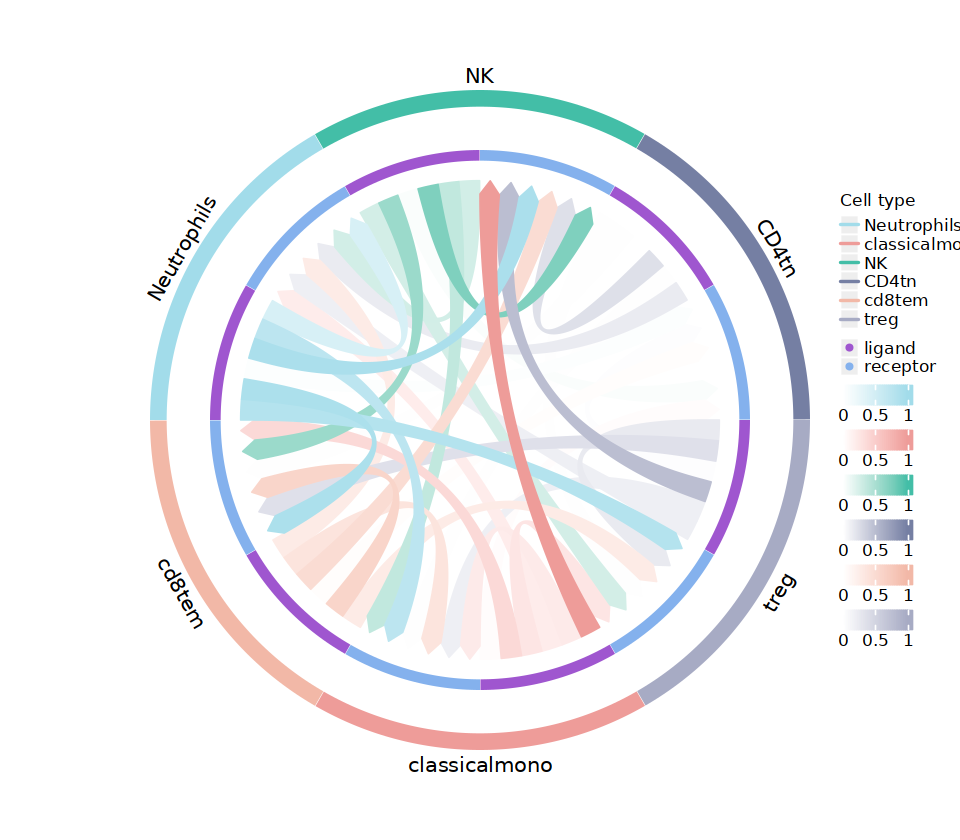

In [78]:
ViewInterCircos(object = mt@data$expr_l_r_log2_scale, font = 2,
                cellColor = cell_color,
                lrColor = c("#9F56CF", "#84B1ED"),
                trackhight1 = 0.05, slot="expr_l_r_log2_scale",
                linkcolor.from.sender = TRUE,
                linkcolor = NULL, gap.degree = 0.1,
                #order.vector=unique(scRNA$celltype),
                trackhight2 = 0.032, track.margin2 = c(0.05,0.12), DIY = T)

In [81]:
options(repr.plot.width = 18)

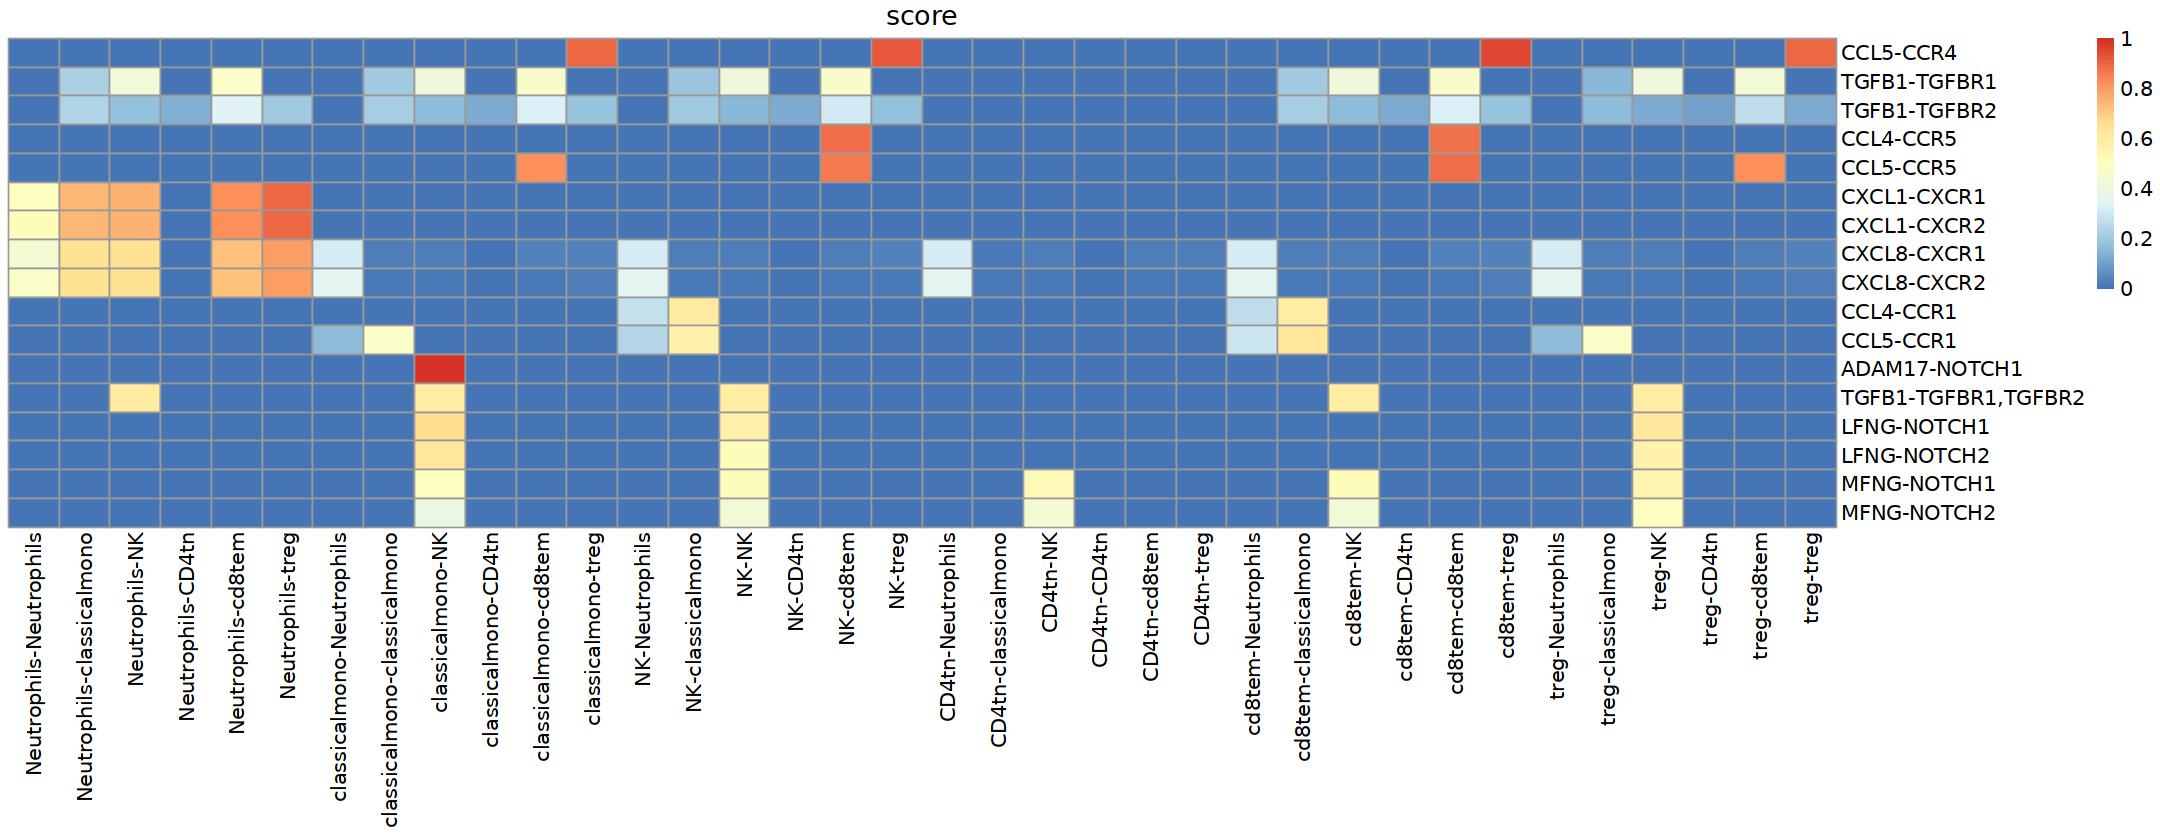

In [83]:
viewPheatmap(object = mt, slot="expr_l_r_log2_scale", show_rownames = T,
             show_colnames = T,treeheight_row=0, treeheight_col=10,
             cluster_rows = T,cluster_cols = F,fontsize = 12,angle_col = "90",
             main="score")

In [84]:
Con.order = colnames(mt@data$expr_l_r_log2_scale)

In [85]:
save(Con.order,file = 'Con.order.rda')

In [86]:
mt1 <- LR2TF(object = mt, sender_cell="cd8tem", recevier_cell="classicalmono",
             slot="expr_l_r_log2_scale", org="Homo sapiens")

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6


In [87]:
library(magrittr)
library(dplyr)
tmp <- mt1@reductions$sankey
tmp1 <- dplyr::filter(tmp, weight1>0)
tmp.df <- trans2tripleScore(tmp1)
head(tmp.df)

,Ligand,Receptor,TF,value
,<chr>,<chr>,<chr>,<dbl>
1,sender:CCL5,receiver:CCR1,TF:FOXO3,0.17891456
2,sender:CCL5,receiver:CCR1,TF:STAT3,0.44545644
3,sender:CCL4,receiver:CCR1,TF:FOXO3,0.17159770
4,sender:CCL4,receiver:CCR1,TF:STAT3,0.42723913
5,sender:TGFB1,receiver:TGFBR2,TF:ATF2,0.03015473
6,sender:TGFB1,receiver:TGFBR2,TF:E2F4,0.02996908


In [88]:
mycol.vector = c('#5d62b5','#29c3be','#f2726f','#62b58f','#bc95df', '#67cdf2', '#ffc533')
elments.num = tmp.df %>% unlist %>% unique %>% length()

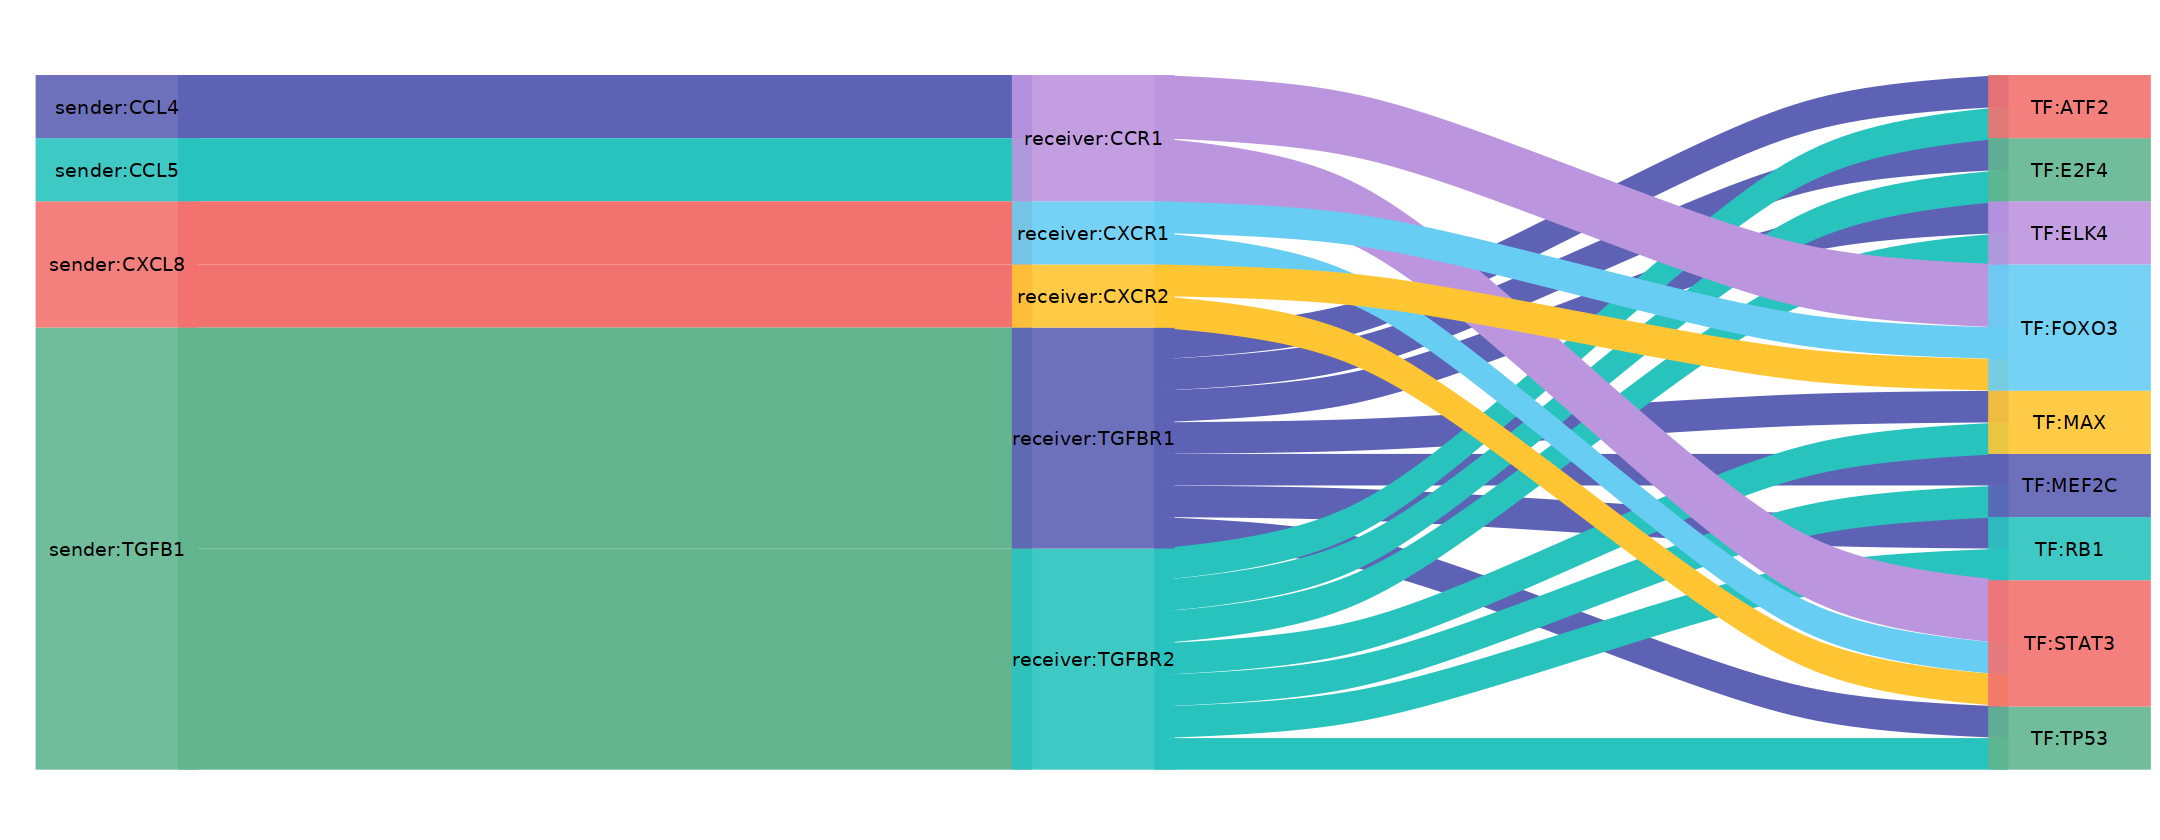

In [89]:
mycol.vector.list <- rep(mycol.vector, times=ceiling(elments.num/length(mycol.vector)))
sankey_graph(df = tmp.df, axes=1:3, mycol = mycol.vector.list[1:elments.num], nudge_x = NULL, font.size = 4, boder.col="white", isGrandSon = F)

In [90]:
tmp <- mt1@reductions$sankey
tmp1 <- dplyr::filter(tmp, weight1>0)
tmp.df <- trans2tripleScore(tmp1)
mycol.vector = c('#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5')
elments.num = length(unique(tmp.df$Ligand))

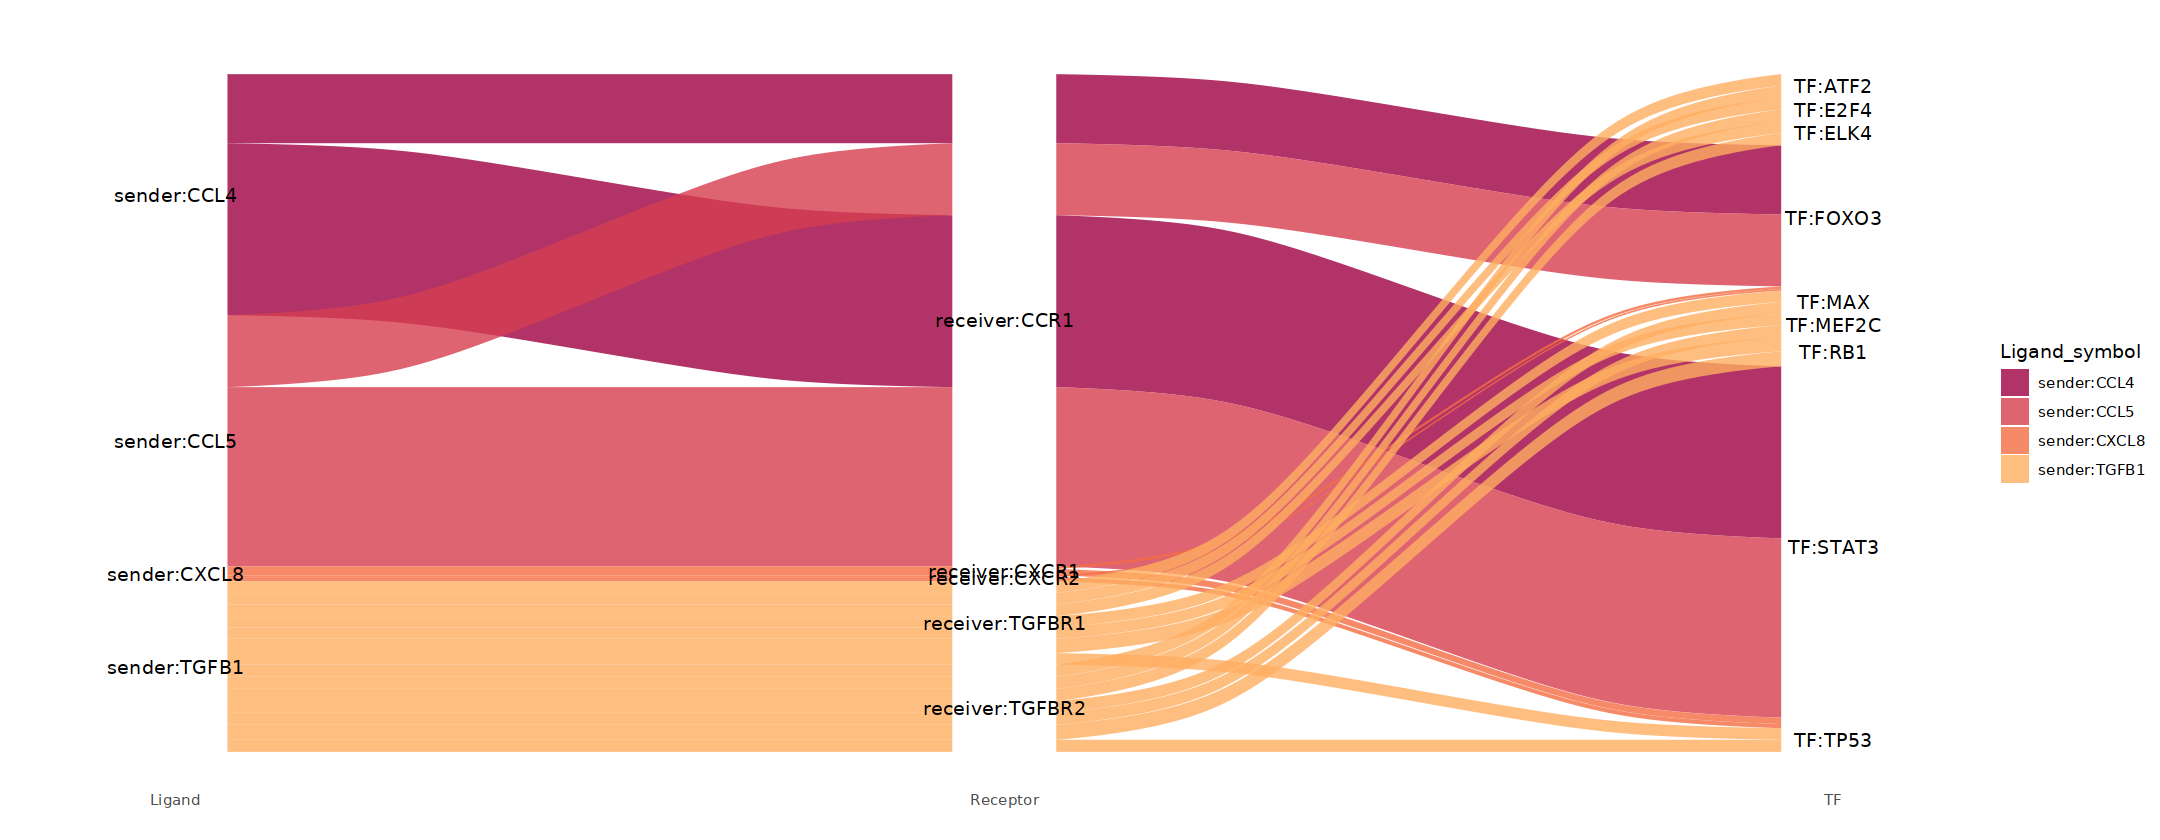

In [91]:

mycol.vector.list= rep(mycol.vector, times=ceiling(elments.num/length(mycol.vector)))
sankey_graph(df = tmp.df, axes=1:3, mycol = mycol.vector.list[1:elments.num],isGrandSon = TRUE, 
             nudge_x = nudge_x, font.size = 4, boder.col="white",
             set_alpha = 0.8)

In [92]:
names(mt@data$gsea.list$classicalmono@geneSets)

[1] "ATF2"   "CREB1"  "CTNNB1" "E2F4"   "ELK4"   "EP300"  "FOXO3"  "MAX"   
 [9] "MEF2C"  "MEF2D"  "MITF"   "RB1"    "RXRA"   "SP1"    "SREBF1" "STAT3" 
[17] "STAT5A" "TCF7L2" "TP53"

In [93]:
getGSEAplot(gsea.list=mt@data$gsea.list, geneSetID=c("JUN","STAT3"),
            myCelltype="classicalmono", fc.list=mt@data$fc.list,
            #selectedGeneID = mt@data$gsea.list$Monocyte@geneSets$JUND[1:10],
            mycol = NULL)

ERROR: Error in if (abs(max.ES) > abs(min.ES)) {: missing value where TRUE/FALSE needed


### t> monocyte

In [ ]:
mt1 <- LR2TF(object = mt, sender_cell="NK", recevier_cell="classicalmono",
             slot="expr_l_r_log2_scale", org="Homo sapiens")

library(magrittr)
library(dplyr)
tmp <- mt1@reductions$sankey
tmp1 <- dplyr::filter(tmp, weight1>0)
tmp.df <- trans2tripleScore(tmp1)
head(tmp.df)

mycol.vector = c('#5d62b5','#29c3be','#f2726f','#62b58f','#bc95df', '#67cdf2', '#ffc533')
elments.num = tmp.df %>% unlist %>% unique %>% length()

mycol.vector.list <- rep(mycol.vector, times=ceiling(elments.num/length(mycol.vector)))
sankey_graph(df = tmp.df, axes=1:3, mycol = mycol.vector.list[1:elments.num], nudge_x = NULL, font.size = 4, boder.col="white", isGrandSon = F)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


,Ligand,Receptor,TF,value
,<chr>,<chr>,<chr>,<dbl>
1,sender:CCL5,receiver:CCR1,TF:FOXO3,0.13553512
2,sender:CCL5,receiver:CCR1,TF:STAT3,0.33745151
3,sender:TGFB1,receiver:TGFBR2,TF:ATF2,0.02270539
4,sender:TGFB1,receiver:TGFBR2,TF:E2F4,0.02256560
5,sender:TGFB1,receiver:TGFBR2,TF:ELK4,0.02288093
6,sender:TGFB1,receiver:TGFBR2,TF:MAX,0.02203716


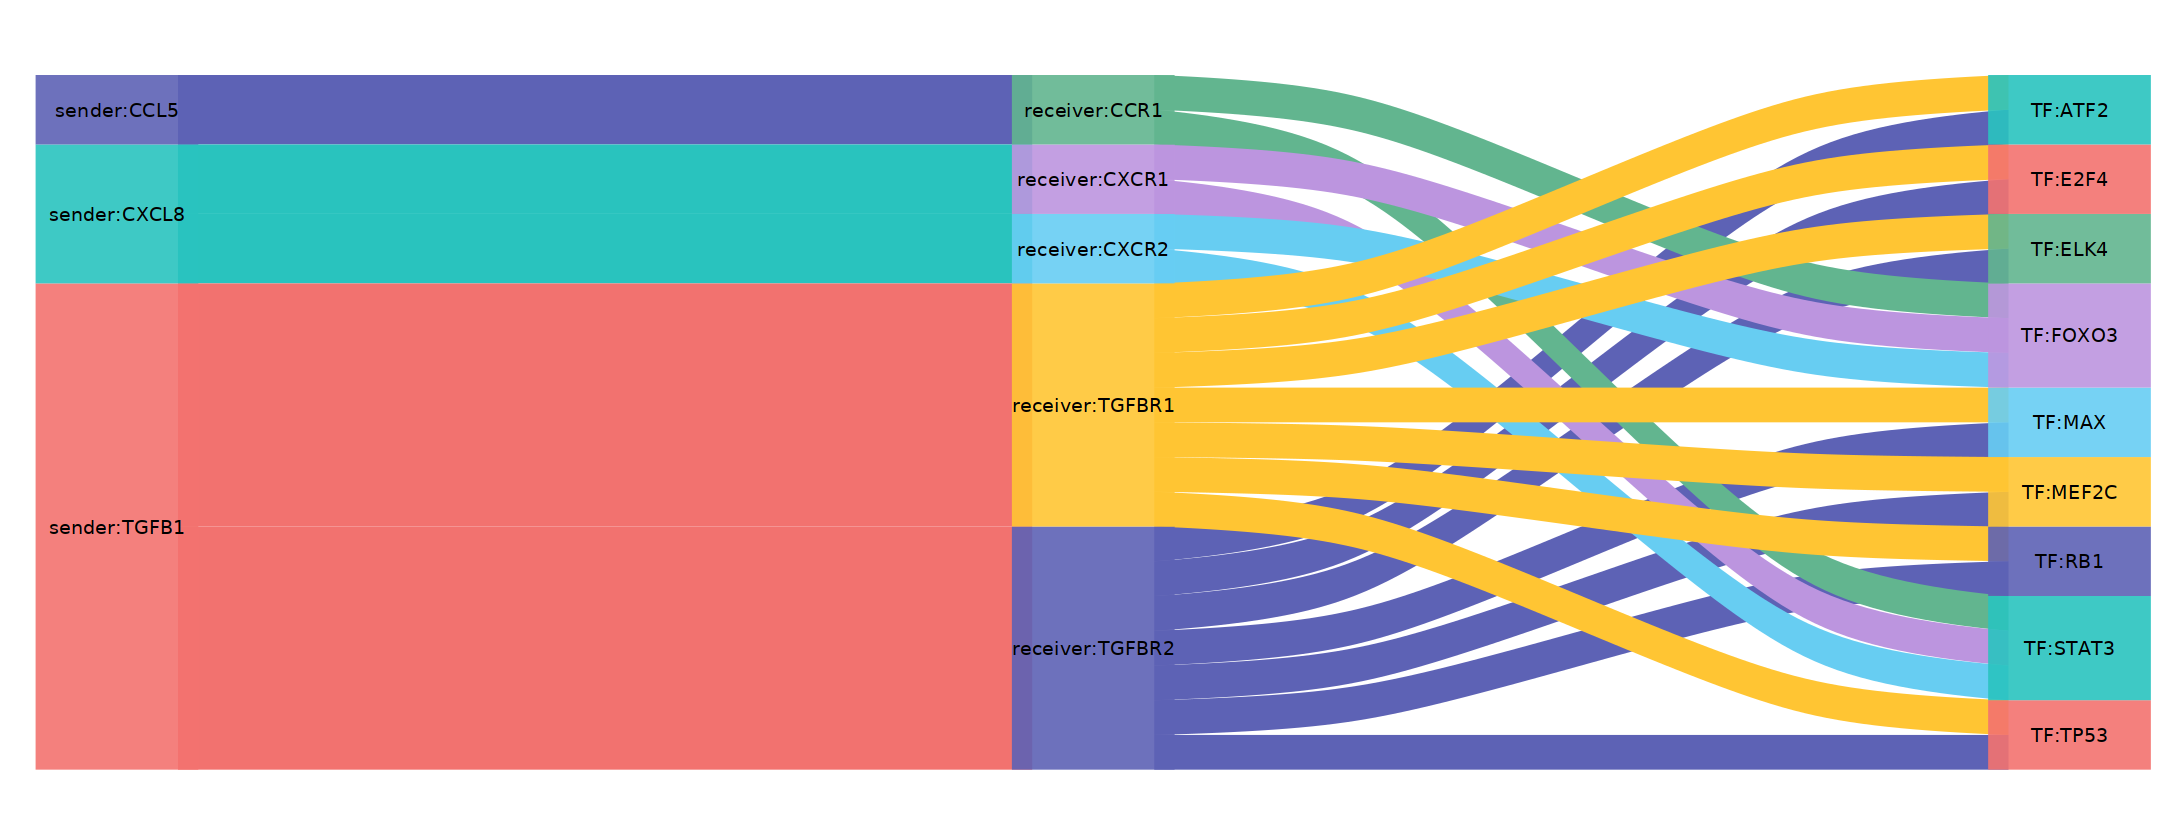

In [100]:
mt1 <- LR2TF(object = mt, sender_cell="treg", recevier_cell="classicalmono",
             slot="expr_l_r_log2_scale", org="Homo sapiens")

library(magrittr)
library(dplyr)
tmp <- mt1@reductions$sankey
tmp1 <- dplyr::filter(tmp, weight1>0)
tmp.df <- trans2tripleScore(tmp1)
head(tmp.df)

mycol.vector = c('#5d62b5','#29c3be','#f2726f','#62b58f','#bc95df', '#67cdf2', '#ffc533')
elments.num = tmp.df %>% unlist %>% unique %>% length()

mycol.vector.list <- rep(mycol.vector, times=ceiling(elments.num/length(mycol.vector)))
sankey_graph(df = tmp.df, axes=1:3, mycol = mycol.vector.list[1:elments.num], nudge_x = NULL, font.size = 4, boder.col="white", isGrandSon = F)